# T015 · Protein ligand docking

Authors:

- Jaime Rodríguez-Guerra, [Volkamer lab, Charité](https://volkamerlab.org/)  
- Dominique Sydow, [Volkamer lab, Charité](https://volkamerlab.org/)  
- Michele Wichmann, [Volkamer lab, Charité](https://volkamerlab.org/)  
- Maria Trofimova, CADD seminar, 2020, Charité/FU Berlin  
- David Schaller, [Volkamer lab, Charité](https://volkamerlab.org/)  

## Aim of this talktorial

In this talktorial, we will use molecular docking to predict the binding mode of a small molecule in a protein binding site. The epidermal growth factor receptor (EGFR) will serve as a model system to explain important steps of a molecular docking workflow with the docking software Smina.

### Contents in *Theory*

- Molecular docking
- Sampling algorithms
- Scoring functions
- Limitations
- Visual inspection
- Docking software
  - Commercial
  - Free (for academics)

### Contents in *Practical*

- Preparation of protein and ligand 
- Binding site definition
- Docking calculation
- Docking results visualization

### References
- Pagadala et al. 2017 _Software for molecular docking: a review_ ([_Biophy Rev_ (2017), __9__, 91-102](https://doi.org/10.1007/s12551-016-0247-1))
- Meng et al. 2011 _Molecular Docking: A Powerful Approach for Structure-Based Drug Discovery_ ([_Curr Comput Aided Drug Des_ (2011), __7__, 2, 146-157](https://doi.org/10.2174/157340911795677602))
- Gromski et al. 2019 _How to explore chemical space using algorithms and automation_ ([_Nat Rev Chem_ (2019), __3__, 119-128](https://doi.org/10.1038/s41570-018-0066-y))
- Warren et al. 2006 _A critical assessment of docking programs and scoring functions_ ([_J Med Chem_ (2006), __49__, 20, 5912-31](https://doi.org/10.1021/jm050362n))
- Wang et al. 2016 _Comprehensive evaluation of ten docking programs on a diverse set of protein-ligand complexes: the prediction accuracy of sampling power and scoring power_ ([_Phys Chem Chem Phys_ (2016), __18__, 18, 12964-75](https://doi.org/10.1039/c6cp01555g))
- Koes et al. 2013 _Lessons Learned in Empirical Scoring with smina from the CSAR 2011 Benchmarking Exercise_ ([_J Chem Inf Model_ (2013), __53__, 8, 1893-1904](https://doi.org/10.1021/ci300604z))
- Fischer et al. 2021 _Decision Making in Structure-Based Drug Discovery: Visual Inspection of Docking Results_ ([_J Med Chem_ (2021)](https://doi.org/10.1021/acs.jmedchem.0c02227))
- [OpenBabel](http://openbabel.org/wiki/Main_Page)
- [Smina](https://sourceforge.net/projects/smina/)
- [NGLView](http://nglviewer.org/nglview/latest/)

## Theory

### Molecular docking

In the modern drug discovery pipeline, determining the binding mode of an active molecule to a given protein target is of utmost importance. Such information can suggest novel chemical modifications to optimize interactions between ligand and protein, thus increasing the binding affinity. Molecular docking software can predict these binding modes by sampling possible conformations of a ligand inside the protein binding pocket (Fig. 1). A scoring function is thereby used to estimate the quality of each binding pose, which is commonly calculated with a variety of terms for different non-covalent molecular interactions; e.g. electrostatic and van der Waals energy ([_Biophy Rev_ (2017), __9__, 91-102](https://doi.org/10.1007/s12551-016-0247-1)). Also, the rise of artificial intelligence lead to the development of algorithms able to generate libraries with billions of theoretically synthesizable molecules ([_Nat Rev Chem_ (2019), __3__, 119-128](https://doi.org/10.1038/s41570-018-0066-y)). Molecular docking can probe these molecules before they were even synthesized and thus, accelerate the discovery of novel lead candidates.

![Protein-ligand complex](images/protein_ligand_complex.png)  
__Fig. 1:__ EGFR in complex with inhibitor ([2ITO](https://www.rcsb.org/structure/2ITO)), _David Schaller_

A molecular docking workflow usually involves the following steps (Fig. 2):

- input file preparation, e.g. protonation and conversion into specific file formats  
- conformational sampling of the ligand inside the binding pocket  
- scoring of docking poses  
- post-processing, e.g. writing a diverse and highly scored set of docking poses  

### Sampling algorithms

Most of the currently available molecular docking tools use one or more of the following algorithms to sample the conformations of ligands inside a protein binding pocket ([_Curr Comput Aided Drug Des_ (2011), __7__, 2, 146-157](https://doi.org/10.2174/157340911795677602)).

#### Matching algorithms

Matching algorithms (MA) compare the shape similarity of ligand conformations and the protein binding pocket, which usually also includes chemical information, e.g. hydrogen bond acceptors and donors. Programs using MA for sampling conformations belong usually to the fastest docking programs. However, these programs require a prior computation of ligand conformations that are used during shape comparison. If the biologically relevant conformation is not present in this library, the algorithm will fail.

#### Incremental construction

In the incremental instruction method, the ligand is first deconstructed into smaller fragments by breaking its rotatable bonds. One of the fragments, for example the biggest one, is placed first into the binding pocket. Subsequently, the complete ligand is incrementally constructed inside the binding pocket by connecting the remaining fragments at the appropriate positions of the core fragment. Incremental construction belongs to the fastest class of algorithms but is limited to medium-sized ligands, since an increasing number of fragments can lead to a combinatorial explosion that can extremely slow down the docking calculation.

#### Stochastic methods

Stochastic methods sample ligand conformations by rigid-body rotation and translation as well as bond rotation.

**Monte Carlo methods** evaluate obtained conformations inside the protein binding pocket with an energy-based selection criterion. If it passes a certain threshold, the conformation is saved and subsequently modified to generate another conformation. This process is performed until a pre-defined number of conformations is reached.

**Genetic algorithms** are inspred by the natural selection conceptos borrowed from Darwin's _Theory of evolution_. Geometric properties of a ligand are thereby stored on so-called _chromosomes_, which define the conformation of the ligand. Genetic operations like mutation and cross-over are used to sample the conformational space of the ligand. A scoring function is then used to estimate the quality of the conformations inside the binding pocket. Genetic alterations with the highest scores are finally used for a new generation, which resembles Darwin's concept of the _survival of the fittest_.

![Docking workflow](images/docking_workflow.png)  
__Fig. 2:__ Docking Workflow, _Michele Wichmann_ and _David Schaller_

### Scoring functions

Scoring functions are used to discriminate correct from incorrect docking poses as well as active from inactive molecules. They need to be as accurate as possible, and at the same time should require little computing time. Thus, they involve many assumptions and simplifications to reduce computational costs ([_Curr Comput Aided Drug Des_ (2011), __7__, 2, 146-157](https://doi.org/10.2174/157340911795677602)).

#### Force field-based

Force field-based scoring functions estimate the binding energy by calculating the strength of non-bonded interactions (e.g. van der Waals force, electrostatic interactions) of the protein-ligand complex. Extensions of these methods also include estimates for entropy and desolvation penalties upon ligand binding. A disadvantage of these scoring functions is their comparably high comutational cost.

#### Empirical

Empirical scoring functions are based on coefficients that are used to estimate the contributions of different interaction types, e.g. hydrogen bonds, ionic interactions, hydrophobic contacts. These coefficients were obtained from a regression analysis of protein-ligand complexes with known binding affinity.

#### Knowledge-based

Knowledge-based scoring functions integrate results from a statistical analysis of experimentally resolved protein-ligand complexes, which gathered information about interatomic contact frequencies and distances observed between protein and ligand. Docking poses will be scored higher if they show contact characteristics that were often observed in the statistical analysis.

### Limitations

Docking programs can consider some residue sidechains flexible during docking calculations to account for binding pocket flexibility. However, the dynamic, adaptive nature of the protein-ligand binding is insufficiently explored by protein ligand docking. This can result in false positives: even if the ligand finds a suitable pose in the binding pocket, this position is not guaranteed until the protein is allowed to explore near-minima conformations. Hence, short molecular dynamics simulations are nowadays recommended to evaluate the stability of the predicted pinding pose ([_Curr Comput Aided Drug Des_ (2011), __7__, 2, 146-157](https://doi.org/10.2174/157340911795677602)).  
Scoring functions used by docking programs must be cheap to compute. While the accuracy is good enough to distinguish good poses from bad poses, it can have problems sorting the best poses. For example, while most popular docking programs are able to find the experimental pose in their calculations, this pose is rarely the best one of the proposed set. Furthermore, several retrospective studies have shown that docking scores often poorly correlate with binding affinity ([_J Med Chem_ (2006), __49__, 20, 5912-31](https://doi.org/10.1021/jm050362n), [_Phys Chem Chem Phys_ (2016), __18__, 18, 12964-75](https://doi.org/10.1039/c6cp01555g)).  
To reduce the computational cost, docking procedures are only performed in a subset of the protein (normally around a known binding pocket). Choosing the correct binding site can become another challenge, if the binding pocket is not known a priori.  
To maximize the accuracy of the calculation, the ligand and protein structures must be prepared appropriately. Protonation states of amino acids and the ligands can be tricky to get right, especially in the case of (potential) tautomers. This introduces yet another cause to obtain wrong results.

### Visual inspection

Due to the afore mentioned limitations of sampling algorithms and docking scoring functions a visual inspection is commonly performed in most docking scenarios. Interestingly, a survey revealed that molecular modeling experts find docking scores to be the least important criterion for selecting docking poses ([_J Med Chem_ (2021)](https://doi.org/10.1021/acs.jmedchem.0c02227)). Instead, the following criteria are used when selecting docking poses:  
- similarity to binding modes observed in available crystal structures of the protein of interest  
- steric as well as electrostatic and hydrophobic complementary of ligand and protein  
  - unsatisfied hydrogen bond donor and acceptor groups in ligand and protein  
  - solvent exposed hydrophobic ligand moieties  
- interactions with side chains or metal ions critical for protein function, e.g. enzymatic activity
- interaction partners and localization of hydrogen bonds
  - hydrogen bonds formed with the protein backbone in an enclosed hydrophobic protein environment are considered more favorable  
  - hydrogen bonds with charged and solvent exposed protein side chains are considered less favorable  
- displacement of or interactions with water molecules in the binding pocket  
- protein and ligand strain induced by ligand binding  

However, also the visual inspection of docking poses has considerable limitations. Of course the success of visual inspection strongly depends on the experience and intuition of the participating scientists. Also, visual inspection can only be performed for a rather small number of molecules considering the available chemical space in virtual screening. Hence, visual inspection is often restricted to the highest scoring molecules of a virtual screening pipeline or only performed for a smaller set of ligands, in which scientists are particularly interested. Finally, also the best expert cannot pick the correct binding pose if it was not sampled by the docking program.

### Docking software

In the following, several docking programs are listed and categorized according to the availability of free licenses. A more comprehensive list can be found at [Wikipedia](https://en.wikipedia.org/wiki/List_of_protein-ligand_docking_software).

#### Commercial
- [GOLD](https://www.ccdc.cam.ac.uk/solutions/csd-discovery/components/gold/)
- [Glide](https://www.schrodinger.com/glide)
- [FlexX](https://www.biosolveit.de/FlexX/)

#### Free (for academics)
- [AutoDock](http://autodock.scripps.edu/)
- [AutoDock Vina](http://vina.scripps.edu/)
- [DOCK](http://dock.compbio.ucsf.edu/)
- [OpenEye](https://www.eyesopen.com/)
- [Smina](https://sourceforge.net/projects/smina/)

## Practical

In this talktorial, we will use the docking software Smina to re-dock a co-crystallized ligand into the protein binding pocket of EGFR. Smina ([_J Chem Inf Model_ (2013), __53__, 8, 1893-1904](https://doi.org/10.1021/ci300604z)) belongs to the AutoDock family of docking software that require preparation of protein and ligand prior to docking. After docking, results will be analyzed for the deviation from the crystal structure.

In [1]:
from pathlib import Path
import subprocess

import nglview as nv
from openbabel import pybel

from opencadd.structure.core import Structure

In [2]:
# define paths
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Preparation of protein and ligand

Programs based on the AutoDock software require protein and ligand to be prepared in PDBQT format ([AutoDock FAQ](http://autodock.scripps.edu/faqs-help/faq/what-is-the-format-of-a-pdbqt-file)). This file format is very similar to the PDB format but additionally stores information about the atom type and partial charges. Luckily, the [OpenBabel](http://openbabel.org/wiki/Main_Page) package provides this functionality. First, we will retrieve a protein-ligand complex of EGFR ([2ITO](https://www.rcsb.org/structure/2ito)) from the Protein Data Bank, save the protein as PDB file and convert it to PDBQT format using OpenBabel.

In [3]:
# retrieve structure from the Protein Data Bank
pdb_id = "2ito"
structure = Structure.from_pdbid(pdb_id)
structure
# NBVAL_CHECK_OUTPUT

<Universe with 2484 atoms>

In [4]:
# write protein
protein = structure.select_atoms("protein")
protein.write(DATA / "protein.pdb")

/home/david/miniconda3/envs/toc_test/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:864: DeprecationWarning: Using the last letter of the segid for the chainID is now deprecated and will be changed in 2.0. In 2.0, the chainID attribute will be used if it exists, or a placeholder value.
  "exists, or a placeholder value.", DeprecationWarning)
/home/david/miniconda3/envs/toc_test/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:1032: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


In [5]:
def pdb_to_pdbqt(pdb_path, pdbqt_path, pH=7.4):
    """
    Convert a PDB file to a PDBQT file needed by docking programs of the AutoDock family.

    Parameters
    ----------
    pdb_path: str or pathlib.Path
        Path to input PDB file.
    pdbqt_path: str or pathlib.path
        Path to output PDBQT file.
    pH: float
        Protonation at given pH.
    """
    molecule = list(pybel.readfile("pdb", str(pdb_path)))[0]
    # add hydrogens at given pH
    molecule.OBMol.CorrectForPH(pH)
    molecule.addh()
    # add partial charges to each atom
    for atom in molecule.atoms:
        atom.OBAtom.GetPartialCharge()
    molecule.write("pdbqt", str(pdbqt_path), overwrite=True)
    return

In [6]:
# convert protein to PDBQT format
pdb_to_pdbqt(DATA / "protein.pdb", DATA / "protein.pdbqt")

Next, we will take care of the ligand preparation. Since we want to re-dock the co-crystallized ligand into the binding site, we can retrieve the ligand in SMILES format directly from the Protein Data Bank ([IRE](https://www.rcsb.org/ligand/IRE)). Again, we will use OpenBabel to generate the PDBQT file.

In [7]:
# define protein-ligand complex of interest
smiles = "COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4"

In [8]:
def smiles_to_pdbqt(smiles, pdbqt_path, pH=7.4):
    """
    Convert a SMILES string to a PDBQT file needed by docking programs of the AutoDock family.

    Parameters
    ----------
    smiles: str
        SMILES string.
    pdbqt_path: str or pathlib.path
        Path to output PDBQT file.
    pH: float
        Protonation at given pH.
    """
    molecule = pybel.readstring("smi", smiles)
    # add hydrogens at given pH
    molecule.OBMol.CorrectForPH(pH)
    molecule.addh()
    # generate 3D coordinates
    molecule.make3D(forcefield="mmff94s", steps=10000)
    # add partial charges to each atom
    for atom in molecule.atoms:
        atom.OBAtom.GetPartialCharge()
    molecule.write("pdbqt", str(pdbqt_path), overwrite=True)
    return

In [9]:
# convert the ligand into PDBQT format
smiles_to_pdbqt(smiles, DATA / "ligand.pdbqt")

### Binding site definition

In theory, it would be possible to perform a docking calculation considering the whole protein as binding site. However, due to the known limitations of docking algorithms, it is always recommended to restrict the binding site to a certain region of interest to increase performance and accuracy. Here, we can use the coordinates of the co-crystallized ligand to define the binding site with a rectangular box. Therefore, we will calculate the geometric center of the molecule, which represents the center of the rectangular box, as well as the length of the molecule in each dimension, which corresponds to the edge lengths of the rectangular box. Also, we will add a 5 Å buffer in each dimension to allow the correct placements of ligands that are bigger than the co-crystallized ligands or bind in a different fashion.

In [10]:
ligand_resname = "IRE"
ligand = structure.select_atoms(f"resname {ligand_resname}")
pocket_center = (ligand.positions.max(axis=0) + ligand.positions.min(axis=0)) / 2
pocket_size = ligand.positions.max(axis=0) - ligand.positions.min(axis=0) + 5

### Docking calculation

Finally, we can proceed to the actual docking calculation. Smina is a command line tool, which currently does not provide a Python API. However, we can write a function that will take care of generating the proper command and execute the calculation. Besides providing the ligand, protein and pocket information, we can also alter the behavior of the docking calculation by setting the number of docking poses to be generated and by changing the exhaustiveness, which controls the number of independent docking calculations.

In [11]:
def run_smina(
    ligand_path, protein_path, out_path, pocket_center, pocket_size, num_poses=10, exhaustiveness=8
):
    """
    Perform docking with Smina.

    Parameters
    ----------
    ligand_path: str or pathlib.Path
        Path to ligand PDBQT file that should be docked.
    protein_path: str or pathlib.Path
        Path to protein PDBQT file that should be docked to.
    out_path: str or pathlib.Path
        Path to which docking poses should be saved, SDF or PDB format.
    pocket_center: iterable of float or int
        Coordinates defining the center of the binding site.
    pocket_size: iterable of float or int
        Lengths of edges defining the binding site.
    num_poses: int
        Maximum number of poses to generate.
    exhaustiveness: int
        Accuracy of docking calculations.

    Returns
    -------
    output_text: str
        The output of the Smina calculation.
    """
    output_text = subprocess.check_output(
        [
            "smina",
            "--ligand",
            str(ligand_path),
            "--receptor",
            str(protein_path),
            "--out",
            str(out_path),
            "--center_x",
            str(pocket_center[0]),
            "--center_y",
            str(pocket_center[1]),
            "--center_z",
            str(pocket_center[2]),
            "--size_x",
            str(pocket_size[0]),
            "--size_y",
            str(pocket_size[1]),
            "--size_z",
            str(pocket_size[2]),
            "--num_modes",
            str(num_poses),
            "--exhaustiveness",
            str(exhaustiveness),
        ],
        universal_newlines=True,
    )
    return output_text

In [12]:
output_text = run_smina(
    DATA / "ligand.pdbqt",
    DATA / "protein.pdbqt",
    DATA / "docking_poses.sdf",
    pocket_center,
    pocket_size,
)
print(output_text)

   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1.923        num_tors_div

Using random seed: -1549030416

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------

The output is a file with the docking poses and a text based description of the docking results including an estimated affinity and the deviation of each pose from the docking pose with the highest predicted affinity ([Vina output description](http://vina.scripps.edu/manual.html#output)).

Let's also check if the output files were generated.

In [13]:
(DATA / "docking_poses.sdf").exists()
# NBVAL_CHECK_OUTPUT

True

### Docking results visualization

Now, let us analyze the docking results. Were we able to reproduce the binding mode observed in the experimentally resolved structure?

Several binding poses were generated and saved as a single SDF file. To allow a more clear visualization with [NGLView](http://nglviewer.org/nglview/latest/), we will split the SDF file and save each docking pose in a separate file.

In [14]:
def split_sdf_file(sdf_path):
    """
    Split an SDF file into seperate files for each molecule.
    Each file is named with consecutive numbers.

    Parameters
    ----------
    sdf_path: str or pathlib.Path
        Path to SDF file that should be split.
    """
    sdf_path = Path(sdf_path)
    stem = sdf_path.stem
    parent = sdf_path.parent
    molecules = pybel.readfile("sdf", str(sdf_path))
    for i, molecule in enumerate(molecules, 1):
        molecule.write("sdf", str(parent / f"{stem}_{i}.sdf"), overwrite=True)
    return

In [15]:
split_sdf_file(DATA / "docking_poses.sdf")

In the next cell, we can visualize each docking pose separately and compare it to the binding mode observed in the X-ray structure. You can also provide the SDF file with all ligands to visualize them all together. The co-crystallized ligand is depicted with ball and sticks, the docking pose as licorice.

In [16]:
docking_pose_id = 1
view = nv.show_structure_file(
    str(DATA / f"docking_poses_{docking_pose_id}.sdf"),
    representations=[{"params": {}, "type": "licorice"}],
)
view.add_pdbid(pdb_id)
view

NGLWidget()

In [17]:
view.render_image(trim=True, factor=2);

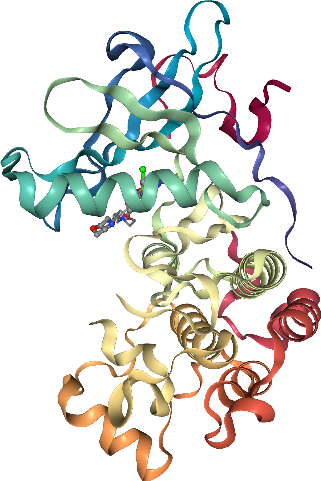

In [18]:
view._display_image()

## Discussion

Using a combination of three free software projects ([OpenBabel](http://openbabel.org/wiki/Main_Page), [Smina](https://sourceforge.net/projects/smina/), [NGLView](http://nglviewer.org/nglview/latest/)), we were able to perform docking calculations and visualize the results.  
However, we aimed for a comparably easy task: the reproduction of an experimentally observed binding mode. In this case, the binding pocket has the ideal protein conformations to harbour the ligand. Docking of other ligands can be more complicated, since they may prefer binding to a different protein conformation. Considering certain sidechains flexible may improve docking results in this situation, but will fail if the protein backbone is changing its conformation upon ligand binding.  
Furthermore, the presented pipeline does not model any missing atoms or residues, which would hamper the docking calculation, if the binding pocket is affected. Here, molecular modeling tools like [PDBFixer](https://github.com/openmm/pdbfixer) could be used to add missing atoms.

## Quiz

- Try to increase the accuracy of the docking calculation via the exhaustiveness parameter. Do you see any improvement? What is the effect on the computational time needed?
- Search the Protein Data Bank for another protein-ligand complex and try to reproduce it.
- Smina provides many more command line options ([documentation on sourceforge](https://sourceforge.net/projects/smina/files/)). Are you able to implement a function that will score the binding pose observed in the X-ray structure? Is the score better or worse than your best scored docking pose?